In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 9]
from numpy.linalg import inv

## data monthly wage

In [2]:
data_wage = pd.read_csv("./data/monthly-wage.csv", sep=";")

In [3]:
data_wage.head()

,Month,Real wage
0,1993-01,100.00
1,1993-02,99.04
2,1993-03,101.77
3,1993-04,110.05
4,1993-05,115.47


In [4]:
data_wage.Month = data_wage.Month.apply(lambda x: datetime.strptime(x, "%Y-%m"))

In [5]:
import time

/home/yeva/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


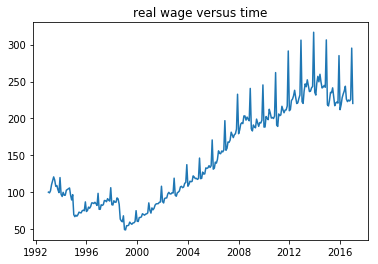

In [6]:
plt.title("real wage versus time")
plt.plot(data_wage.Month, data_wage["Real wage"]);

## data energy consumption

In [7]:
data_energy = pd.read_csv("./data/energy_consump.csv")

In [8]:
data_energy.head()

,Hub,ZSP,Date,EnergyConsump,Temp1,Temp2,Temp3,Temp4,Temp5,Temp6,...,Saturday,Sunday,Temp1_South_Less,Temp2_South_Less,Temp3_South_Less,Temp4_South_Less,Temp1_South_Gr,Temp2_South_Gr,Temp3_South_Gr,Temp4_South_Gr
0,Center,FZSZOE27,2010-01-01,147487.171,-17.8,-16.9,NaN,NaN,NaN,NaN,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Center,FZSZOE27,2010-01-02,155433.800,-17.8,-20.3,NaN,NaN,NaN,NaN,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Center,FZSZOE27,2010-01-03,164140.232,-16.4,-24.0,NaN,NaN,NaN,NaN,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Center,FZSZOE27,2010-01-04,171382.848,-10.2,-15.7,NaN,NaN,NaN,NaN,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Center,FZSZOE27,2010-01-05,170188.290,-7.2,-8.8,NaN,NaN,NaN,NaN,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data_energy.Date = data_energy.Date.apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

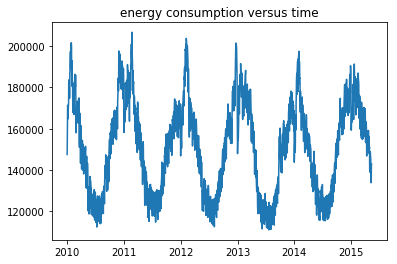

In [10]:
plt.title("energy consumption versus time")
plt.plot(data_energy.Date, data_energy.EnergyConsump);

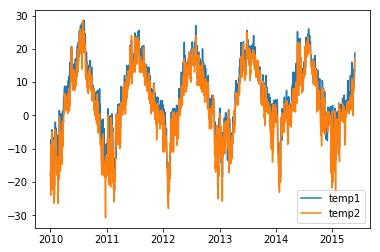

In [11]:
plt.plot(data_energy.Date, data_energy.Temp1, label="temp1")
plt.plot(data_energy.Date, data_energy.Temp2, label="temp2")
plt.legend();

## data item sales with missing data

In [12]:
data_item = pd.read_csv("./data/TimeSeries_Data10.csv")

In [13]:
data_item.head()

,Dates,Item: 165,Item: 969,Item: 2653,Item: 2654,Item: 2692,Item: 2695,Item: 2697,Item: 2765,Item: 2767,Item: 2806,Item: 2808
0,11.01.2005,NaN,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12.01.2005,NaN,5.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13.01.2005,NaN,2.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14.01.2005,NaN,42.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15.01.2005,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
data_item.Dates = data_item.Dates.apply(lambda x: datetime.strptime(x, "%d.%m.%Y"))

In [15]:
item_names = list(data_item.columns)[1:]

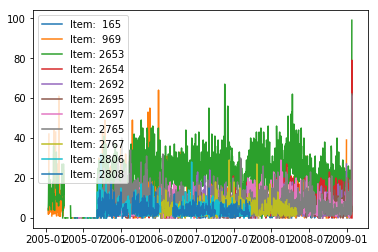

In [16]:
line_objects = plt.plot(data_item.Dates, data_item[item_names])
plt.legend(iter(line_objects), item_names);

## montly temperature

In [17]:
data_temp = pd.read_csv("./data/monthly-temperature-in-england-f.csv", sep=",")

In [18]:
data_temp.head()

,Month,"Monthly temperature in England (F), 1723-1970"
0,1723-01,1.1
1,1723-02,4.4
2,1723-03,7.5
3,1723-04,8.9
4,1723-05,11.7


In [19]:
data_temp.Month = data_temp.Month.apply(lambda x: datetime.strptime(x, "%Y-%m"))

In [20]:
data_temp.columns = ["Month", "temp"]
def parse_temp(x):
    if x[0] == '?': return float(x[1:])
    else: return float(x)
data_temp.temp = data_temp.temp.apply(parse_temp)

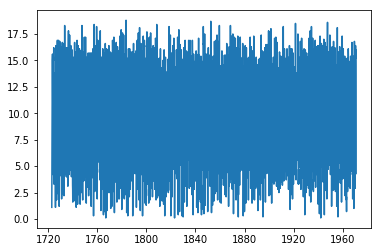

In [21]:
plt.plot(data_temp.Month, data_temp.temp);

## data price of currency 

In [22]:
data_price = pd.read_csv("./data/price_data.csv")

In [23]:
data_price.head()

,id,amount,price,timestamp,type
0,138712293,0.020000,29038.5,1558453201,sell
1,138712292,0.020000,29038.5,1558453201,sell
2,138712317,0.251731,29031.5,1558453201,sell
3,138712316,0.030000,29034.8,1558453201,sell
4,138712315,0.020000,29034.8,1558453201,sell


In [24]:
data_price["datetime"] = data_price.timestamp.apply(lambda x: datetime.fromtimestamp(x))

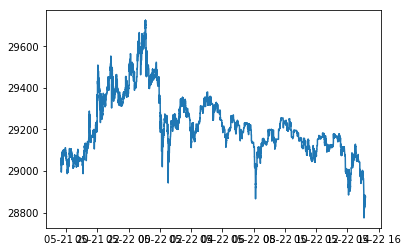

In [25]:
plt.plot(data_price.datetime, data_price.price);

## stl decomposition

In [26]:
import statsmodels.api as sm

res = sm.tsa.seasonal_decompose(data_wage["Real wage"], freq=12,
                                model="multiplicative")

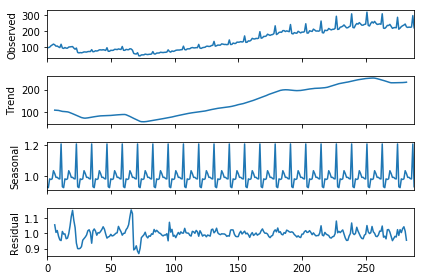

In [27]:
res.plot();

In [85]:
class time_series_regression:
    def __init__(self, window, step=1):
        self.window  = window
        self.step = step
        self.weights = np.array([])
        self.point = np.array([])
    
    def regresion(self, features, targets):
        weights = ((inv((features.T).dot(features))).dot(
            features.T)).dot(targets)
        return weights
    
    def train(self, data):
        t = len(data) - self.step
        feature_matrix = []
        targets = []
        for i in range(self.window, t+1):
            datum = np.array([data[k] for k in range(i-self.window, i)])
            feature_matrix.append(datum)
            targets.append(data[i-1 + self.step])
        targets = np.array(targets)
        targets = targets.reshape((-1, 1))
        self.weights = self.regresion(np.array(feature_matrix), targets)
        self.point = data[(len(data)-self.window):]
        
    def predict(self):
        return ((self.weights).flatten()).dot(self.point)
        
    
    

In [86]:
time_data = np.array(data_price.price)
len(time_data)

40667

In [87]:
model = time_series_regression(100, step=20)

In [88]:
model.train(time_data)

In [89]:
model.predict()

28875.541776987055